In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import holoviews as hv
hv.extension('bokeh')

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Use global and groupby aggregates to answer the questions

In [3]:
#What is the average tip amount
tips['tip'].mean()

2.9982786885245902

In [4]:
#What is the average bill amount
tips['total_bill'].mean()

19.785942622950824

In [5]:
#What is the average tip by gender
tips['tip'].groupby(tips['sex']).mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [6]:
#What is the average tip on a sunday by gender
tips['tip'].groupby([tips['sex'],tips['day'] == 'Sun']).mean()

sex     day  
Male    False    3.013030
        True     3.220345
Female  False    2.694203
        True     3.367222
Name: tip, dtype: float64

In [87]:
#Which party size gives the maximum tip as a percent of total bill amount
tips['tip_percentage'] = tips['tip'] / tips['total_bill']
tips.groupby(['size'])['tip_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,0.217292,0.080342,0.137931,0.170779,0.202752,0.249265,0.325733
2,156.0,0.165719,0.066848,0.035638,0.135223,0.156104,0.195036,0.710345
3,38.0,0.152157,0.045459,0.056433,0.124758,0.159323,0.186135,0.230742
4,37.0,0.145949,0.042395,0.077459,0.117750,0.146699,0.169797,0.280535
5,5.0,0.141495,0.067733,0.065660,0.106572,0.121389,0.172194,0.241663
6,4.0,0.156229,0.042153,0.103799,0.131654,0.162891,0.187466,0.195335


# Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)

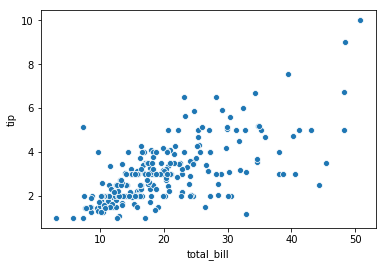

In [7]:
#Generate the plots using seaborn
sns.scatterplot(x='total_bill', y='tip', data=tips)

Text(0.5,1,'Scatter Plot of Tip and Bill')

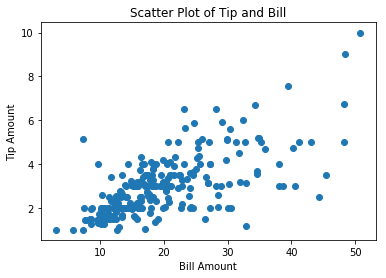

In [8]:
#Generate the plots using matplotlib
%matplotlib inline
plt.scatter(tips.total_bill,tips.tip)
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot of Tip and Bill')

In [88]:
#Generate the plots using bokeh
output_notebook()
x = tips['total_bill']
y = tips['tip']
p = figure(title='Scatter Plot for Tip and Bill',x_axis_label='Bill amount',y_axis_label='Tip amount')
p.scatter(x, y,fill_color='red', size = 10)
show(p)

Loading BokehJS ...

# Generate a box plot that shows average bill amount by different column

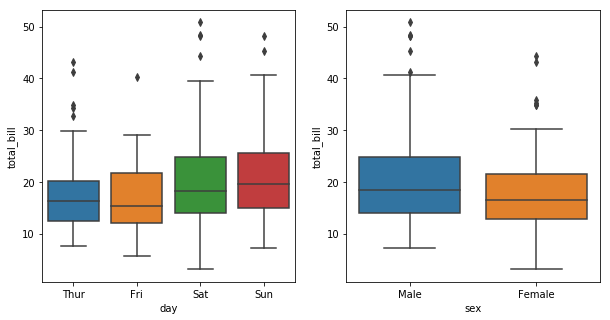

In [75]:
#Generate a box plot that shows average bill amount by day of week and by gender using seaborn side by side
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='day',y='total_bill', data=tips)
plt.subplot(1, 2, 2)
sns.boxplot(x='sex',y='total_bill', data=tips)

Text(0.5,1,'Bill Amount by Gender')

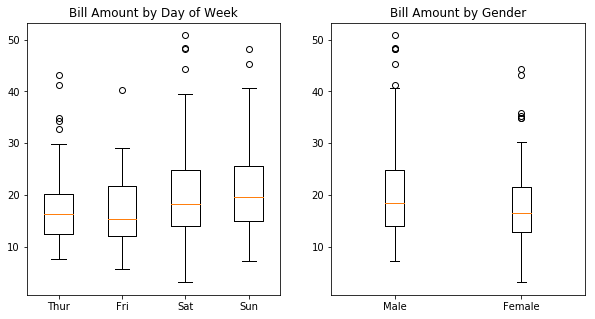

In [70]:
#Generate a box plot that shows average bill amount by day of week and by gender using matplotlib side by side
plt.figure(figsize=(10,5))
days = ['Thur', 'Fri', 'Sat', 'Sun']
sex = ['Male', 'Female']

def get_total_bill_by_days(day):
    return tips.groupby(tips['day'])['total_bill'].get_group(day)

def get_total_bill_by_gender(gender):
    return tips.groupby(tips['sex'])['total_bill'].get_group(gender)

total_bills = []
for day in days:
    total_bills.append(get_total_bill_by_days(day))

plt.subplot(1, 2, 1)
plt.boxplot(total_bills)
plt.gca().set_xticklabels(days)
plt.title('Bill Amount by Day of Week')


total_bills = []
for g in sex:
    total_bills.append(get_total_bill_by_gender(g))

plt.subplot(1, 2, 2)
plt.boxplot(total_bills)
plt.gca().set_xticklabels(sex)
plt.title('Bill Amount by Gender')


In [77]:
#Generate a box plot that shows average bill amount by day of week and by gender using bokeh side by side
boxwhisker = hv.BoxWhisker(tips, ['day'], 'total_bill', label = 'Bill Amount by Day of Week')
boxwhisker2 = hv.BoxWhisker(tips, ['sex'], 'total_bill', label = 'Bill Amount by Gender')
show(boxwhisker + boxwhisker2)

ModuleNotFoundError: No module named 'holoviews'

## Examine the linear relationship between tips and total_bill across different dimensions

C:\Users\yunxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Non-smoker seems to give a higher tip as percentage of total_bill


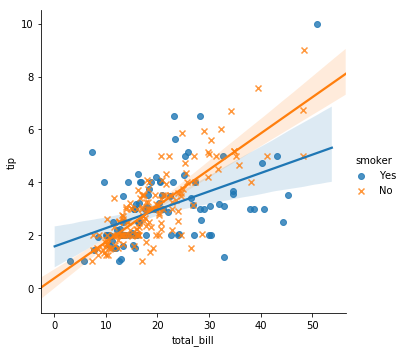

In [80]:
#Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'])
print('Non-smoker seems to give a higher tip as percentage of total_bill')

C:\Users\yunxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Tips are larger during lunch


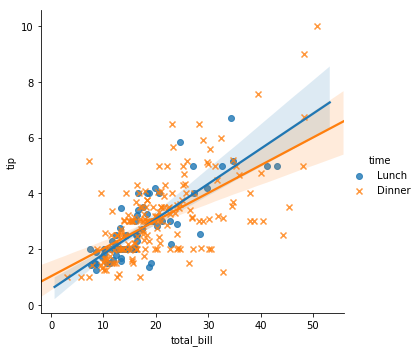

In [81]:
#Are tips larger during lunch or dinner (as a percentage of total_bill)
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, markers=['o', 'x'])
print('Tips are larger during lunch')

C:\Users\yunxia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Male is more likely to pay more tip for both lunch and dinner


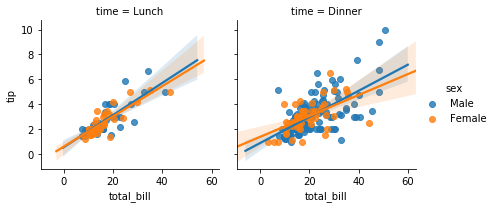

In [90]:
#Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
sns.lmplot(x='total_bill', y='tip', hue='sex', col='time', data=tips, height=3)
print('Male is more likely to pay more tip for both lunch and dinner')